In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


<AxesSubplot:xlabel='Price'>

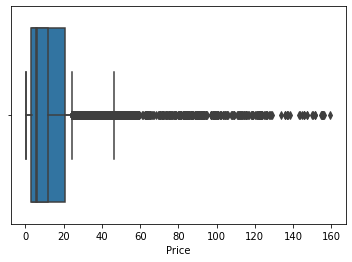

In [12]:
# đọc dữ liệu
df = pd.read_csv("FoodPrice_in_Turkey.csv", encoding = "ISO-8859-1")

# in ra kich thuoc du lieu
df.shape
df.describe()
df.info()
# kiểm tra dữ liệu bị khuyết
df.isna()
# kiểm tra dữ liệu không bị khuyết
df.notna()
# xóa những dòng chứa giá trị bị khuyết
df1 = df.dropna()
df1.shape
sns.boxplot(x=df1['Price'])  # vẽ box plot cho dữ liệu ở cột Price
#Xóa dữ liệu ngoại lai bằng IQR scoreIn [ ]:
Q1 = df1['Price'].quantile(0.25)
Q3 = df1['Price'].quantile(0.75)
IQR = Q3 - Q1
# xác định phần tử không phải ngoại lai
df2 = df1
df2['outlier'] = ~((df1['Price'] < (Q1 - 1.5*IQR)) | (df1['Price'] > (Q3 + 1.5*IQR)))
# xóa phần tử ngoại lai
df2 = df2[df2['outlier'] == True]
sns.boxplot(x=df2['Price'])  # vẽ box plot cho dữ liệu ở cột Price


count    6784.000000
mean       10.503617
std        11.661447
min         0.253900
25%         3.079550
50%         5.373350
75%        11.541925
max        46.251900
Name: Price, dtype: float64


<AxesSubplot:xlabel='Price', ylabel='Density'>

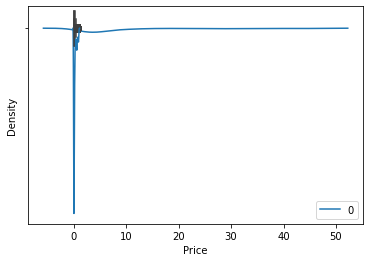

In [19]:
#Chuẩn hóa dữ liệuIn [ ]:

# mô tả dữ liệu
print(df2['Price'].describe())
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df2['Price'])
# chuẩn hóa dữ liệu với minmax scaling
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu trong df với Min max scaling ở 2 cột Price
df_s = scaler.fit_transform(df2[['Price']])
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df_s)